# INM706 - Deep Learning for Sequence Analysis

Authors: Laerte Adami - Elisa Troschka

Source: 
- https://towardsdatascience.com/a-comprehensive-guide-to-neural-machine-translation-using-seq2sequence-modelling-using-pytorch-41c9b84ba350#30b6
- https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html#evaluation

English vocabulary size: 2548
Italian vocabulary size: 3885
EPOCH 1: train loss =  3.146
EPOCH 2: train loss =  2.385
EPOCH 3: train loss =  2.265
EPOCH 4: train loss =  2.214
EPOCH 5: train loss =  2.191
EPOCH 6: train loss =  2.181
EPOCH 7: train loss =  2.147
EPOCH 8: train loss =  2.111
EPOCH 9: train loss =  2.079
EPOCH 10: train loss =  2.055
EPOCH 11: train loss =  2.021
EPOCH 12: train loss =  2.008
EPOCH 13: train loss =  1.995
EPOCH 14: train loss =  1.948
EPOCH 15: train loss =  1.88
EPOCH 16: train loss =  1.834
EPOCH 17: train loss =  1.786
EPOCH 18: train loss =  1.745
EPOCH 19: train loss =  1.708
EPOCH 20: train loss =  1.669
--------------------------------
Time required: 331.9478085041046


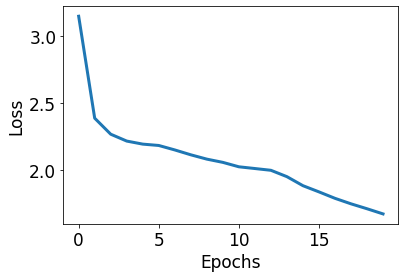

In [1]:
import time
from Utilities.lstmHandler import EncoderLSTM, DecoderLSTM, AttentionDecoderLSTM
from Utilities.modelHandler import LSTModel
from Utilities.LanguageDataset import LanguageDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss as CEL
from torch.optim import Adam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

plt.rcParams['font.size'] = 17

start_token = '<BoS>'
end_token = '<EoS>'

dataset = LanguageDataset(data_path="Data/eng_ita.tsv", start_token = start_token, end_token = end_token)

embedding_size = 256

loss_func = CEL()

end_index = dataset.from_ita[end_token]
start_index = dataset.from_ita[start_token]

trainloader = DataLoader(dataset, batch_size = 100)

print("English vocabulary size: {}".format(dataset.eng_voc_size))
print("Italian vocabulary size: {}".format(dataset.ita_voc_size))

encoder = EncoderLSTM(vocabulary_size = dataset.eng_voc_size,
                     embedding_size = embedding_size,
                     num_layers = 1, 
                     bidirectional = False)

#decoder = DecoderLSTM(vocabulary_size = dataset.ita_voc_size,
#                     embedding_size = embedding_size,
#                     num_layers = 1, 
#                     bidirectional = False)

decoder = AttentionDecoderLSTM(vocabulary_size = dataset.ita_voc_size,
                     embedding_size = embedding_size,
                     seq_len = dataset.seq_len,
                     num_layers = 1, 
                     bidirectional = False)


model = LSTModel(encoder = encoder, 
                 decoder = decoder, 
                 encoder_optimizer = Adam(encoder.parameters()), 
                 decoder_optimizer = Adam(decoder.parameters()),
                 loss_function = loss_func, 
                 eos_token = end_index, 
                 bos_token = start_index)

start_time = time.time()
L = model.train_model(trainloader, 
                  max_epochs = 20,
                  save_every_epochs = 20,
                  ckp_name = 'test')
print("--------------------------------")
print("Time required: {}".format(time.time()-start_time))
      
fig, ax = plt.subplots()
ax.plot(L, linewidth = 3)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");

## Training

In [2]:
X, y, trans = model.evaluate_model(trainloader, max_length=20)#, enc_ckp = "test_enc_20.pth", dec_ckp="test_dec_20.pth")

In [25]:
ids = 29
print("English: " + dataset.translate(X[ids],'eng'))
print("Italian: " + dataset.translate(y[ids],'ita'))
print("Translation: " + dataset.translate(trans[ids],'ita'))

English:  <BoS> Is it a recent picture <EoS> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
Italian:  <BoS> È una foto recente <EoS> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
Translation:  <BoS> È un un un <EoS> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>


In [ ]:
sent = trans[67]
print("English: " + dataset.translate(sent[0],'eng'))
print("Italian: " + dataset.translate(sent[1],'ita'))
print("Translation: " + dataset.translate(sent[2],'ita'))

In [ ]:
sent = trans[34]
print("English: " + dataset.translate(sent[0],'eng'))
print("Italian: " + dataset.translate(sent[1],'ita'))
print("Translation: " + dataset.translate(sent[2],'ita'))